# **📘 Assignment 2: Mastering Big Data Handling**

TIEW CHUAN RONG

DANIAL HARRIZ BIN MOHD ASINEH @MOHD ASNEH

**Install kagglehub[pandas-datasets]:**

-Installs the core kagglehub package, which can download and use datasets hosted on Kaggle using code and support loading datasets as Pandas DataFrames.

In [5]:
!pip install kagglehub[pandas-datasets]

**Install kaggle:**

This is used to install the official Kaggle API Python package called kaggle.

In [6]:
!pip install kaggle

**Upload kaggle.json:**

This is the API token file that contains user Kaggle credentials.As Kaggle requires authentication for most API operations to verify user. To permission to download datasets

In [7]:
from google.colab import files
files.upload()  # Select the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiewrong","key":"ff4f31306f849e9c50230749305a156a"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Task1: Dataset selection**

**Download dataset:**

Dowload dataset from kaggle using kaggle command. We download from ismetsemedov/transactions. Then, unzip the zip file downloaded.

In [9]:
!kaggle datasets download ismetsemedov/transactions --unzip -p ./transactions

Dataset URL: https://www.kaggle.com/datasets/ismetsemedov/transactions
License(s): apache-2.0
 91% 687M/754M [00:04<00:01, 48.4MB/s]
100% 754M/754M [00:04<00:00, 181MB/s] 


# **Task 2: Load and Inspect Data using different library**

**Load the data using Pandas library:**

Load the data normally using pandas library with pd.read_csv(). Then record the processing time and memory usage.

In [1]:
import pandas as pd
import time
import psutil
import os

file_path = './transactions/synthetic_fraud_data.csv'

process = psutil.Process(os.getpid())

# Measure memory before loading
start_time = time.time()

# Read in chunks
df1 = pd.read_csv(file_path)

end_time = time.time()
time_pandas= end_time - start_time
mem_pandas =df1.memory_usage(deep=True).sum() / (1024**2)  # in MB

# Results

print(f"Processing Time: {time_pandas:.2f} seconds")
print(f"Memory Usage Increase: {mem_pandas:.2f} MB")


Processing Time: 106.48 seconds
Memory Usage Increase: 9062.15 MB


**Load the data using Polars library:**

Polars is a fast library that reads (pl.read_csv()) data quickly by using multiple CPU threads at the same time.

In [2]:
import polars as pl
import time
import psutil
import os

file_path = './transactions/synthetic_fraud_data.csv'
process = psutil.Process(os.getpid())

# Measure memory before loading

start_time = time.time()

# Read the CSV using Polars (very fast and memory-efficient)
df2 = pl.read_csv(file_path)

end_time = time.time()
time_polars = end_time - start_time
mem_polars = df2.estimated_size() / (1024**2)

# Output results
print(f"DataFrame shape: {df2.shape}")
print(f"Processing Time: {time_polars:.2f} seconds")
print(f"Memory Usage Increase: {mem_polars:.2f} MB")


DataFrame shape: (7483766, 24)
Processing Time: 15.30 seconds
Memory Usage Increase: 2528.16 MB


**Load the data using Dask Library:**


In [4]:
import dask.dataframe as dd
import time
import psutil
import os

file_path = './transactions/synthetic_fraud_data.csv'
process = psutil.Process(os.getpid())

# Measure memory before loading
start_time = time.time()

# Read the CSV using Dask
df3 = dd.read_csv(file_path)

# Compute number of rows by counting a column (e.g., the first one)
n_rows = df3[df3.columns[0]].count().compute()
n_cols = len(df3.columns)
df_shape = (n_rows, n_cols)

end_time = time.time()
time_Dask = end_time - start_time

# Proper memory usage computation
mem_Dask = df3.memory_usage(deep=True).compute().sum() / (1024**2)  # in MB

# Output results
print(f"DataFrame shape: {df_shape}")
print(f"Processing Time: {time_Dask:.2f} seconds")
print(f"Memory Usage Increase: {mem_Dask:.2f} MB")



DataFrame shape: (np.int64(7483766), 24)
Processing Time: 106.75 seconds
Memory Usage Increase: 3466.69 MB


# **Task4: Comparative Analysis**

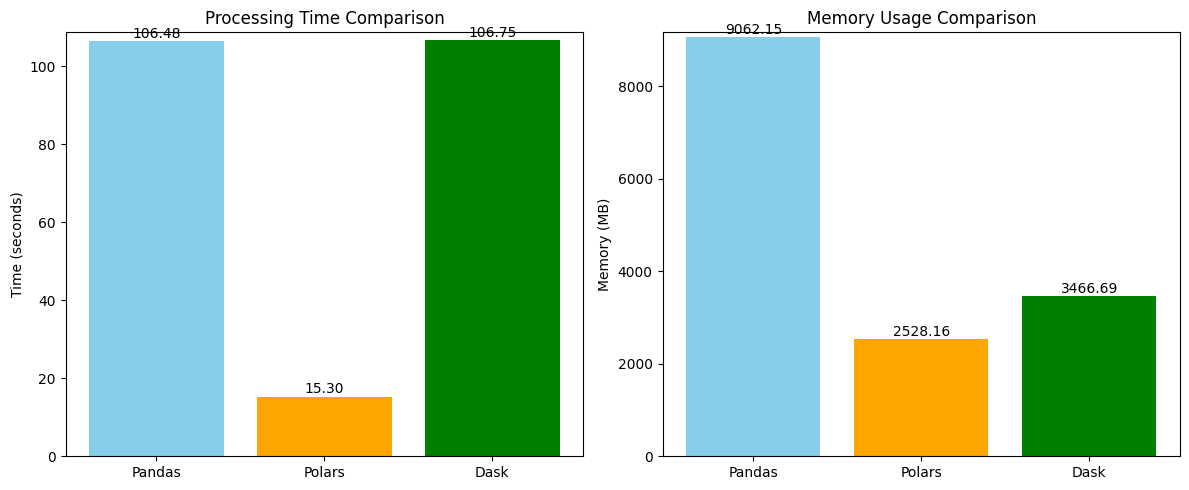

In [6]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual measured values)
libraries = ['Pandas', 'Polars', 'Dask']
processing_times = [time_pandas, time_polars, time_Dask]  # in seconds
memory_usages = [mem_pandas, mem_polars, mem_Dask]        # in MB

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for processing time
bars1 = ax[0].bar(libraries, processing_times, color=['skyblue', 'orange', 'green'])
ax[0].set_title('Processing Time Comparison')
ax[0].set_ylabel('Time (seconds)')
ax[0].set_ylim(0, max(processing_times) + 2)

# Add value labels to bars for processing time
for bar in bars1:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.2f}', ha='center', va='bottom')

# Bar chart for memory usage
bars2 = ax[1].bar(libraries, memory_usages, color=['skyblue', 'orange', 'green'])
ax[1].set_title('Memory Usage Comparison')
ax[1].set_ylabel('Memory (MB)')
ax[1].set_ylim(0, max(memory_usages) + 100)

# Add value labels to bars for memory usage
for bar in bars2:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height + 5, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
